In [1]:
!mecab -o ./neko.txt.mecab ./neko.txt

# 30.形態素解析結果の読み込み

In [1]:
res = []
keitaisos = []

with open('neko.txt.mecab') as text:
    for line in text:
        line = line.split('\t')
        if line[0] != 'EOS\n':     
            if line[0] == '\n'  or line[0] == '' or line[0] == '\u3000':
                continue
            else:

                split = line[1].split(',')
                keitaiso = {'表層格':line[0],'基本形':split[6],'品詞':split[0],'品詞細分類1':split[1]}
                keitaisos.append(keitaiso)
        else:
            res.append(keitaisos)
            keitaisos =[]

for i in res[10]:
    print(i)
            

{'表層格': 'しかし', '基本形': 'しかし', '品詞': '接続詞', '品詞細分類1': '*'}
{'表層格': 'その', '基本形': 'その', '品詞': '連体詞', '品詞細分類1': '*'}
{'表層格': '当時', '基本形': '当時', '品詞': '名詞', '品詞細分類1': '副詞可能'}
{'表層格': 'は', '基本形': 'は', '品詞': '助詞', '品詞細分類1': '係助詞'}
{'表層格': '何', '基本形': '何', '品詞': '名詞', '品詞細分類1': '代名詞'}
{'表層格': 'という', '基本形': 'という', '品詞': '助詞', '品詞細分類1': '格助詞'}
{'表層格': '考', '基本形': '考', '品詞': '名詞', '品詞細分類1': '一般'}
{'表層格': 'も', '基本形': 'も', '品詞': '助詞', '品詞細分類1': '係助詞'}
{'表層格': 'なかっ', '基本形': 'ない', '品詞': '形容詞', '品詞細分類1': '自立'}
{'表層格': 'た', '基本形': 'た', '品詞': '助動詞', '品詞細分類1': '*'}
{'表層格': 'から', '基本形': 'から', '品詞': '助詞', '品詞細分類1': '接続助詞'}
{'表層格': '別段', '基本形': '別段', '品詞': '副詞', '品詞細分類1': '助詞類接続'}
{'表層格': '恐し', '基本形': '恐い', '品詞': '形容詞', '品詞細分類1': '自立'}
{'表層格': 'いとも', '基本形': 'いとも', '品詞': '副詞', '品詞細分類1': '一般'}
{'表層格': '思わ', '基本形': '思う', '品詞': '動詞', '品詞細分類1': '自立'}
{'表層格': 'なかっ', '基本形': 'ない', '品詞': '助動詞', '品詞細分類1': '*'}
{'表層格': 'た', '基本形': 'た', '品詞': '助動詞', '品詞細分類1': '*'}
{'表層格': '。', '基本形': '。', '品詞': '記号', '品詞細分類1': '句点'}


# 31.動詞

In [2]:
verb_surface = set()
for sentence in res:
    for word in sentence:
        if word['品詞'] == '動詞':
            verb_surface.add(word['表層格'])
            

list(verb_surface)[:5]

['きかかっ', '答え', 'ぶら', '届い', '発する']

# 32.動詞の基本形

In [3]:
verb_base = set()
for sentence in res:
    for word in sentence:
        if word['品詞'] == '動詞':
            verb_base.add(word['基本形'])
            
list(verb_base)[:5]

['狂わせる', 'ぬる', '発する', '仰ぐ', '案ずる']

# 33.「AのB」

In [4]:
noun = []
for sentence in res:
    for i in range(1, len(sentence)-1):
        if sentence[i - 1]['品詞'] == '名詞' and sentence[i]['表層格'] == 'の' and sentence[i + 1]['品詞'] == '名詞':
            noun.append(sentence[i - 1]['表層格'] + sentence[i]['表層格'] + sentence[i + 1]['表層格'])

list(noun)[:5]

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中']

# 34.名詞の連接

In [18]:
count = 0
noun = []
nouns = ''
for sentence in res:
    for word in sentence:
        if word['品詞'] == '名詞':
            nouns = ''.join([nouns,word['表層格']])
            count += 1
        else:
            if count >= 2:
                noun.append(nouns)
                nouns = ''
                count = 0
            else:
                nouns = ''
                count = 0
    nouns = ''
    count = 0

noun[:5]

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫']

# 35.単語の出現頻度

In [6]:
ans = {}
for sentence in res:
    for word in sentence:
        if word['表層格'] in ans:
            ans[word['表層格']] += 1
        else:
            ans[word['表層格']] = 1
            
ans = sorted(ans.items(), key = lambda x:x[1], reverse = True)

ans[:10]

[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988)]

# 36.頻度上位10語

<BarContainer object of 10 artists>

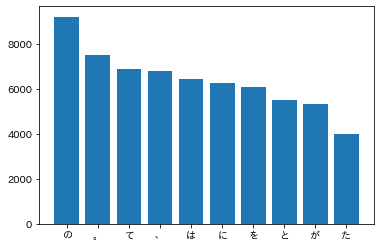

In [7]:
import matplotlib.pyplot as plt
import japanize_matplotlib


keys = [key[0] for key in ans[:10]]
values = [value[1] for value in ans[:10]]

fig , ax = plt.subplots()
ax.bar(keys,values)


# 37.「猫」と共起頻度の高い上位10単語

<BarContainer object of 10 artists>

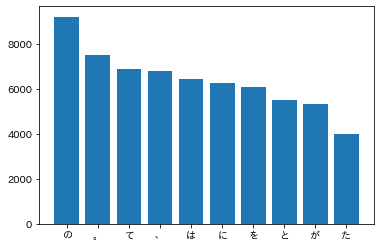

In [8]:
ans_neko = {}
for sentence in res:
    if '猫' in [s['表層格'] for s in sentence]:
        for word in sentence:
            if word['表層格'] in ans:
                ans_neko[word['表層格']] += 1
            else:
                ans_neko[word['表層格']] = 1

del ans_neko['猫']
ans_neko = sorted(ans_neko.items(), key = lambda x:x[1], reverse = True)

keys = [key[0] for key in ans[:10]]
values = [value[1] for value in ans[:10]]

fig , ax = plt.subplots()
ax.bar(keys,values)


# 38.ヒストグラム

(array([1.3474e+04, 5.5000e+01, 1.4000e+01, 8.0000e+00, 0.0000e+00,
        8.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.84860e+02, 3.68720e+02, 5.52580e+02, 7.36440e+02,
        9.20300e+02, 1.10416e+03, 1.28802e+03, 1.47188e+03, 1.65574e+03,
        1.83960e+03, 2.02346e+03, 2.20732e+03, 2.39118e+03, 2.57504e+03,
        2.75890e+03, 2.94276e+03, 3.12662e+03, 3.31048e+03, 3.49434e+03,
        3.67820e+03, 3.862

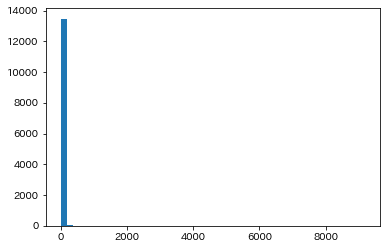

In [9]:
ans = {}
for sentence in res:
    for word in sentence:
        if word['表層格'] in ans:
            ans[word['表層格']] += 1
        else:
            ans[word['表層格']] = 1
            
fig , ax = plt.subplots()
ax.hist(ans.values(),bins = 50)

# 39.Zipfの法則 

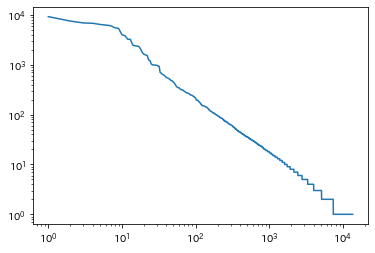

In [10]:
ans = {}
for sentence in res:
    for word in sentence:
        if word['表層格'] in ans:
            ans[word['表層格']] += 1
        else:
            ans[word['表層格']] = 1
            
ans = sorted(ans.items(), key = lambda x:x[1], reverse = True)

x = [i+1 for i in range(len(ans))]
y = [i[1] for i in ans]

fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_yscale('log')  
ax.set_xscale('log')